#Instagram Reach Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import math
import pickle

import warnings
warnings.filterwarnings('ignore')

##Data preprocessing

In [2]:
data = pd.read_csv("/content/drive/MyDrive/ml/instagram reach/Instagram data.csv", encoding = 'latin1')
data.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
data.shape

(119, 13)

In [4]:
data.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


##Data Visualization

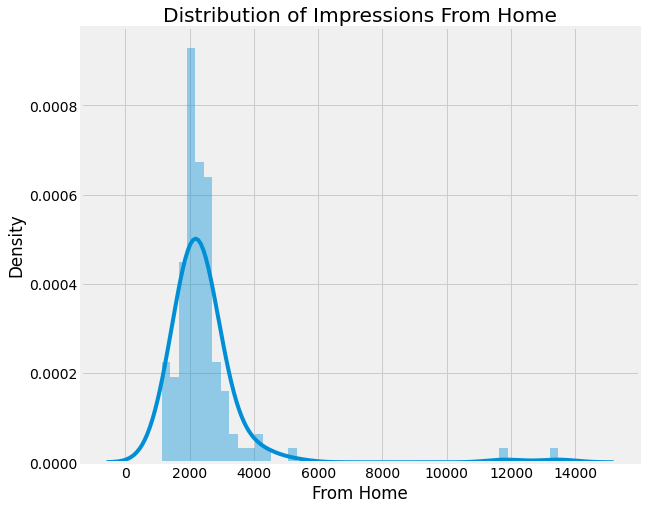

In [6]:
plt.figure(figsize=(10, 8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impressions From Home")
sns.distplot(data['From Home'])
plt.show()

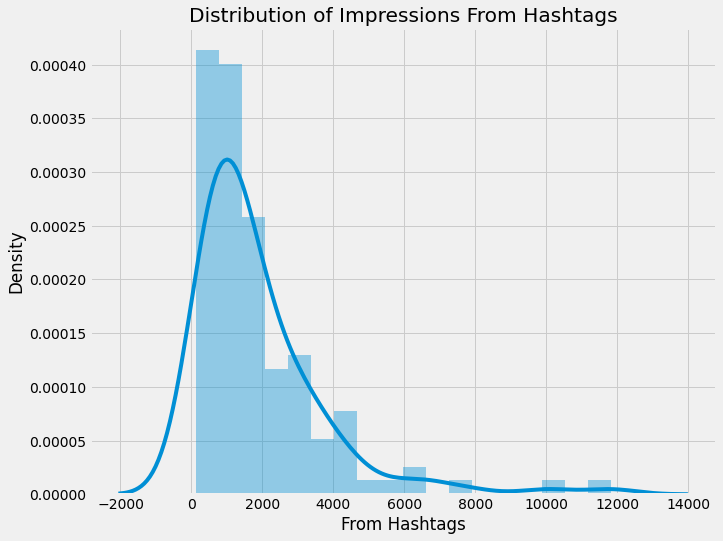

In [7]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Hashtags")
sns.distplot(data['From Hashtags'])
plt.show()

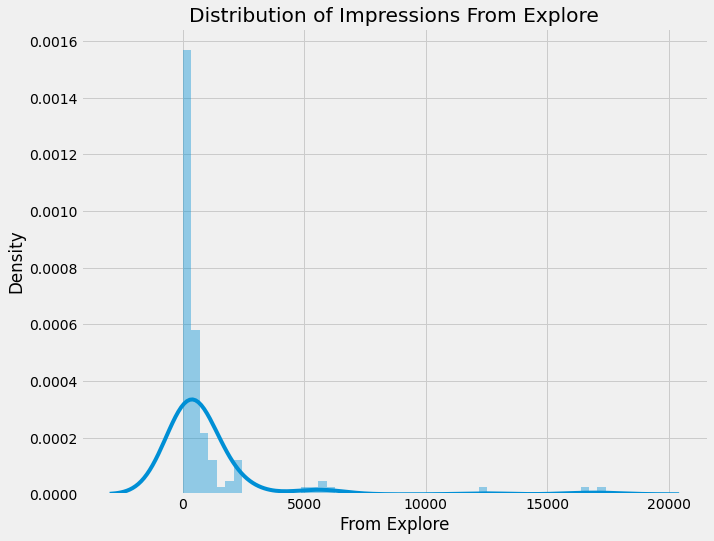

In [8]:
plt.figure(figsize=(10, 8))
plt.title("Distribution of Impressions From Explore")
sns.distplot(data['From Explore'])
plt.show()


In [9]:
home = data["From Home"].sum()
hashtags = data["From Hashtags"].sum()
explore = data["From Explore"].sum()
other = data["From Other"].sum()

labels = ['From Home','From Hashtags','From Explore','Other']
values = [home, hashtags, explore, other]

fig = px.pie(data, values=values, names=labels, 
             title='Impressions on Instagram Posts From Various Sources', hole=0.5,width=800, height=400)
fig.show()

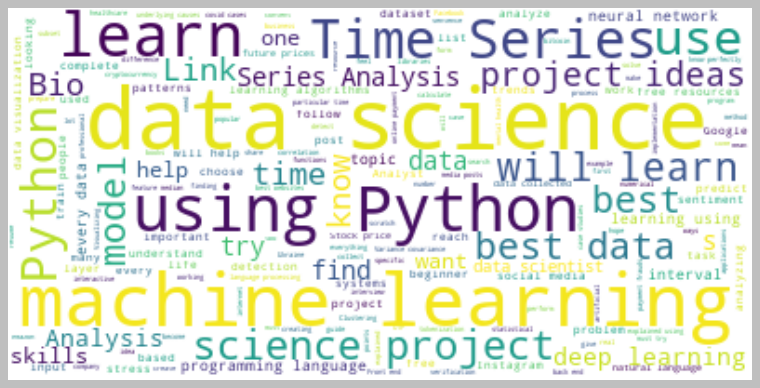

In [10]:
text = " ".join(i for i in data.Caption)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.style.use('classic')
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

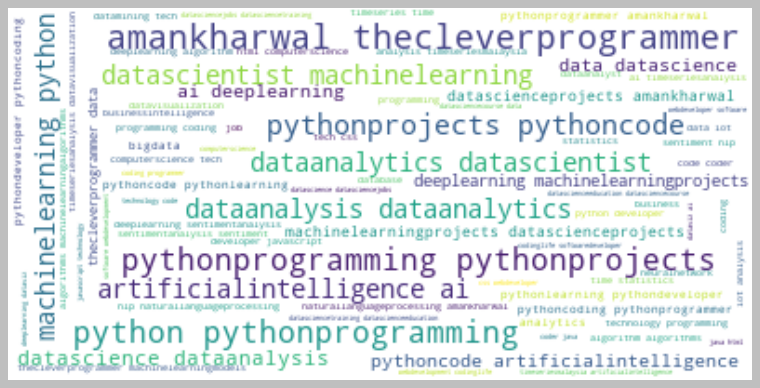

In [11]:
text = " ".join(i for i in data.Hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [12]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions",width=800, height=600)
figure.show()

In [13]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions",width=800, height=600)
figure.show()

In [14]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions",width=800, height=600)
figure.show()

In [15]:
figure = px.scatter(data_frame = data, x="Impressions",
                    y="Saves", size="Saves", trendline="ols", 
                    title = "Relationship Between Post Saves and Total Impressions",width=800, height=600)
figure.show()

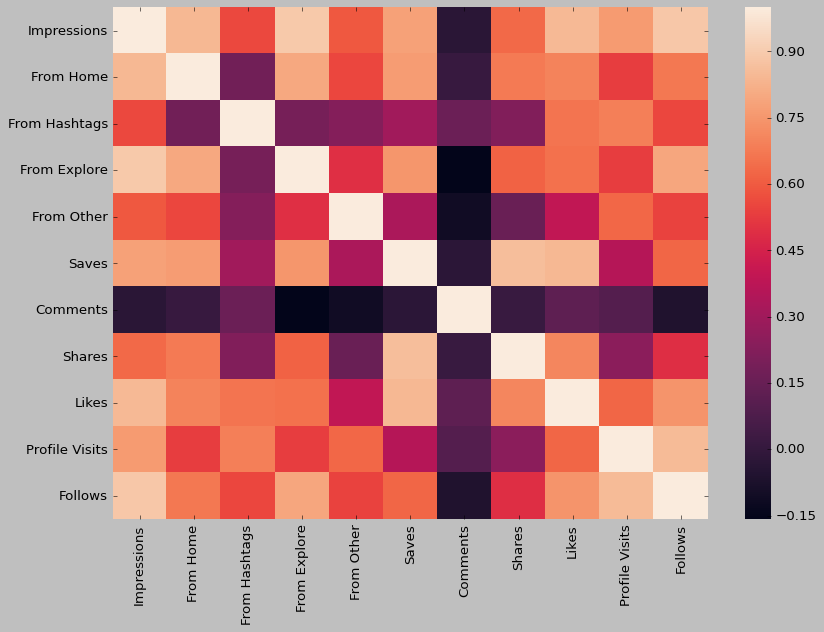

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr())

In [17]:
correlation = data.corr()
print(correlation["Impressions"].sort_values(ascending=False))


Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64


In [18]:
conversion_rate = (data["Follows"].sum() / data["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


In [19]:
figure = px.scatter(data_frame = data, x="Profile Visits",
                    y="Follows", size="Follows", trendline="ols", 
                    title = "Relationship Between Profile Visits and Followers Gained",width=800, height=600)
figure.show()

#Creating Predictive models 

In [20]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import LinearRegression

**Spliting The Data**

In [21]:
x = np.array(data[['From Explore','Follows', 'Likes', 'From Home', 'Saves','Profile Visits', 'Shares']])

y = np.array(data["Impressions"])

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
print('length of X_train:',len(xtrain))
print('length of y_train:',len(ytrain))
print('length of X_test:',len(xtest))
print('length of y_test:',len(ytest))

length of X_train: 95
length of y_train: 95
length of X_test: 24
length of y_test: 24


**PassiveAggressiveRegressor**

In [23]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.9257010357638995

In [24]:
y_pred0 = model.predict(xtest)  
y_pred0

array([ 3967.02798652,  6954.62894511,  2643.55424452,  4784.84800468,
        3708.42896947, 27990.4468434 ,  2602.56976381,  2153.98717433,
        9007.62690936,  3128.10584721,  4003.12081788,  9804.79984832,
        3318.6370172 ,  2650.60411252,  3811.67555663,  2976.11841808,
        2772.19483356,  4054.92769757,  3438.61333223,  4864.19256794,
        7413.34154369, 11582.86281328,  3708.42896947,  4732.87910595])

In [25]:
MSE_PAG = mean_squared_error(ytest,y_pred0)
MAE_PAG = mean_absolute_error(ytest, y_pred0)
R2_SCORE_PAG = r2_score(ytest,y_pred0)*100
RMSE_PAG = math.sqrt(MSE_PAG)

In [26]:
print('mean_square_error : ', MSE_PAG )
print('root_mean_squared_error : ', RMSE_PAG )
print('mean_absolute_error : ', MAE_PAG )
print('r2_score : ', R2_SCORE_PAG )


mean_square_error :  2885604.4701722953
root_mean_squared_error :  1698.7067051649308
mean_absolute_error :  1157.4713585504308
r2_score :  92.57010357638995


In [27]:
data.head(3)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...


In [41]:
# Features = np.array(data[['From Explore','Follows', 'Likes', 'From Home', 'Saves','Profile Visits', 'Shares']]) 

features = np.array([[1174, 10, 224, 2727, 194, 48, 14]])
model.predict(features)

array([5619.9652518])

**Linear Regression**

In [29]:
lin_reg = LinearRegression()
lin_reg.fit(xtrain,ytrain)
lin_reg.score(xtest,ytest)

0.962717361250788

In [30]:
y_pred1 = lin_reg.predict(xtest)  
y_pred1

array([ 5060.67670022,  8250.04436725,  3334.27570003,  5459.23703212,
        4718.31643887, 28993.79541274,  3213.77686922,  2716.96986493,
        9177.32044782,  3755.94250404,  4644.82959452, 11098.18404268,
        3888.71505913,  3237.03468387,  4483.55065469,  3474.28390472,
        3487.71171095,  5163.89393267,  4325.48928448,  5583.11251184,
        8133.25758653, 13561.88746446,  4718.31643887,  5733.01379317])

In [31]:
MSE_LIN_REG = mean_squared_error(ytest,y_pred1)
MAE_LIN_REG = mean_absolute_error(ytest, y_pred1)
R2_SCORE_LIN_REG = r2_score(ytest,y_pred1)*100
RMSE_LIN_REG = math.sqrt(MSE_LIN_REG)

In [32]:
print('mean_square_error : ',MSE_LIN_REG )
print('root_mean_squared_error : ', RMSE_LIN_REG )
print('mean_absolute_error : ', MAE_LIN_REG )
print('r2_score : ', R2_SCORE_LIN_REG )

mean_square_error :  1447973.738808494
root_mean_squared_error :  1203.3178045755385
mean_absolute_error :  883.3042573993107
r2_score :  96.2717361250788


In [42]:
# Features = np.array(data[['From Explore','Follows', 'Likes', 'From Home', 'Saves','Profile Visits', 'Shares']]) 

features = np.array([[1174, 10, 224, 2727, 194, 48, 14]])
lin_reg.predict(features)

array([6776.6546597])

In [34]:
pickle.dump(lin_reg,open('Linear_Regression.pkl','wb'))

##Model Comparision

In [35]:
table = pd.DataFrame({'Models':['Passive Aggressive Regressor','Linear Regression'],
                      'MSE':[MSE_PAG, MSE_LIN_REG],
                      'RMSE':[RMSE_PAG, RMSE_LIN_REG],
                      'MAE':[MAE_PAG, MAE_LIN_REG],
                      'R2_SCORE':[R2_SCORE_PAG, R2_SCORE_LIN_REG]
                      })
table

,Models,MSE,RMSE,MAE,R2_SCORE
0,Passive Aggressive Regressor,2.885604e+06,1698.706705,1157.471359,92.570104
1,Linear Regression,1.447974e+06,1203.317805,883.304257,96.271736


In [36]:
table.to_csv(r'/content/drive/MyDrive/ml/instagram reach/model_result.csv', index = False)

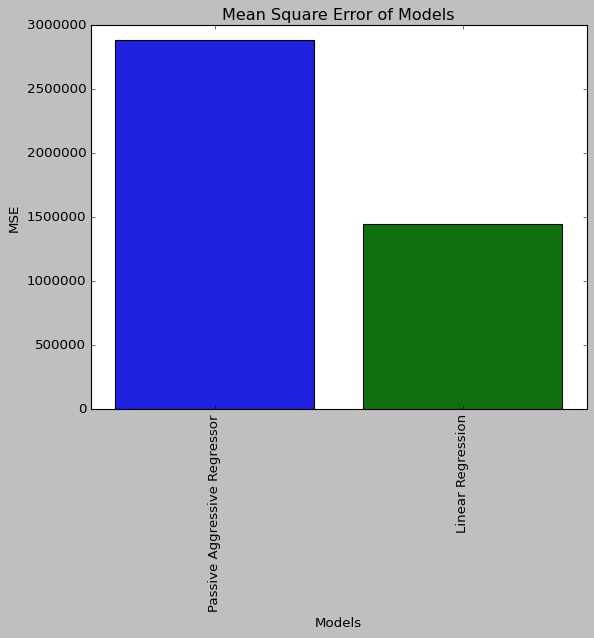

In [37]:
plt.figure(figsize = (8,6))
sns.barplot(y = table.MSE,x = table.Models)
plt.title("Mean Square Error of Models")
plt.xticks(rotation = 'vertical')
plt.show()

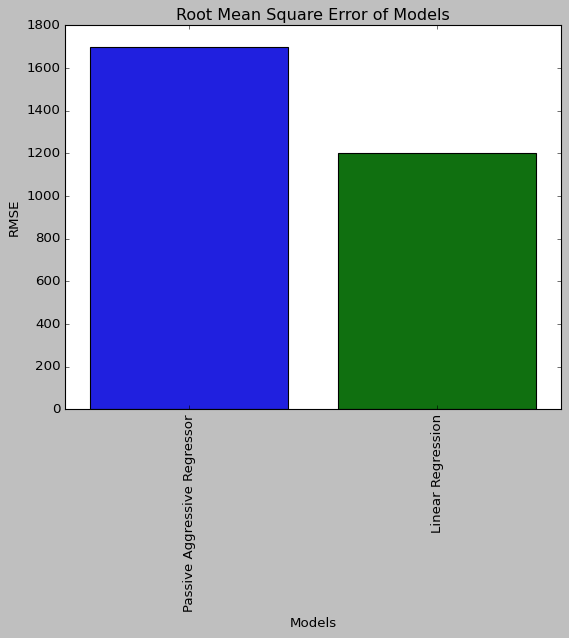

In [38]:
plt.figure(figsize = (8,6))
sns.barplot(y = table.RMSE,x = table.Models)
plt.title("Root Mean Square Error of Models")
plt.xticks(rotation = 'vertical')
plt.show()

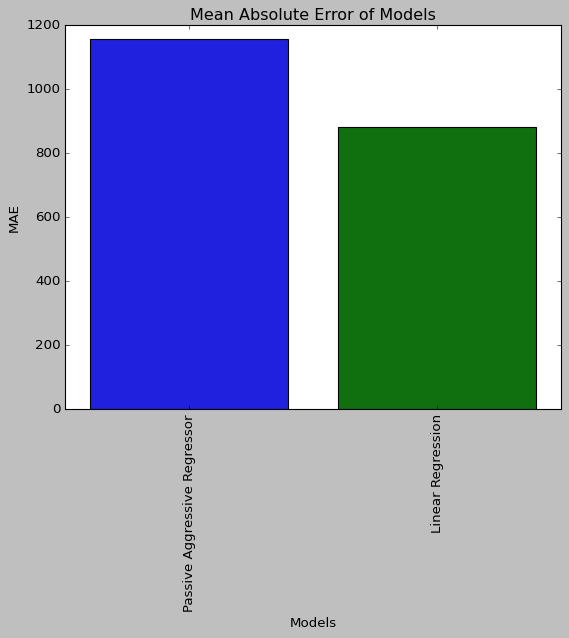

In [39]:
plt.figure(figsize = (8,6))
sns.barplot(y = table.MAE,x = table.Models)
plt.title("Mean Absolute Error of Models")
plt.xticks(rotation = 'vertical')
plt.show()

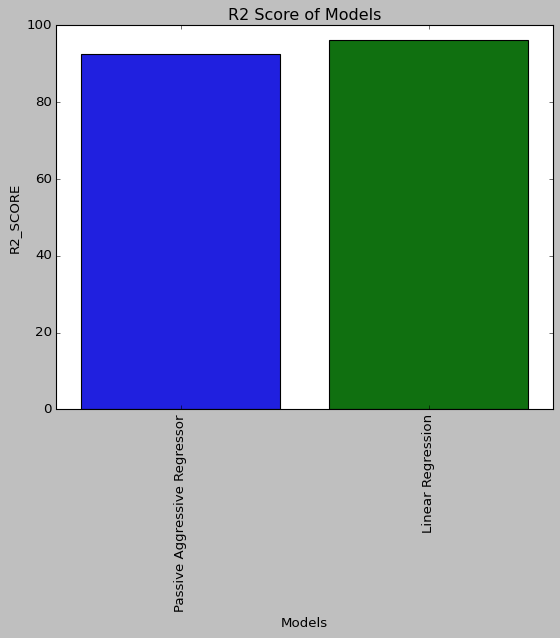

In [40]:
plt.figure(figsize = (8,6))
sns.barplot(y = table.R2_SCORE,x = table.Models)
plt.title("R2 Score of Models")
plt.xticks(rotation = 'vertical')
plt.show()